In [18]:
%matplotlib inline
from __future__ import division, print_function

from scipy import stats as ss
from scipy.stats import rankdata

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from statsmodels.stats import multitest
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.quantile_regression import QuantReg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm

Quantile Regression Results
===========================

Quantile regression is a interesting for our problem because it:
   - Is robust to non non-normal errors and outliers
   
     http://fmwww.bc.edu/EC-C/S2013/823/EC823.S2013.nn04.slides.pdf     
     http://www.econ.uiuc.edu/~roger/research/rq/QRJEP.pdf
     
   - Focuses on the conditional quantiles. Allows for better interpretation of effects
     of variables. In a lot of cases, the effect is not on the conditional mean (OLS assumption)
     
     http://fmwww.bc.edu/EC-C/S2013/823/EC823.S2013.nn04.slides.pdf
     http://www.econ.uiuc.edu/~roger/research/rq/QRJEP.pdf
   
   - Is robust to data representation (no need to normalize etc etc)
   
     http://www.econ.uiuc.edu/~roger/research/rq/QRJEP.pdf
     
Good ref for math mechanics: 
http://www.jmlr.org/papers/volume7/meinshausen06a/meinshausen06a.pdf

Nice introduction for other fields: 
http://www.econ.uiuc.edu/~roger/research/rq/QReco.pdf

Quantile Regression Crash Course
--------------------------------

Plots from: 
 http://www.econ.uiuc.edu/~roger/research/rq/QReco.pdf
 
 Important ref!

http://ajbuckeconbikesail.net/Econ616/Quantile/JASA1999.pdf
 https://www.jstor.org/stable/2669943
 
  (this ref provides intuiton on how to use the method, for now we can ignore the math)

**First of, what do we mean by conditional quantiles**

In [2]:
#from IPython.display import Image
#Image(filename='ex1.png')

**First task**

Find out where the variables matter (left plot)

Left plot is a r-squared like value. Greater is best. But interpretation of variance does not exist.
From this paper and others, I noticed that the ideia is less of trying to maximize this. It is a tool
to interpret where the covariates matter.

** Second task ** 

Look into the effect of covaritates (right plot)

ps: I don't fully understand the middle plot, it is similar to the right one but another quality measure.

In [3]:
#from IPython.display import Image
#Image(filename='ex2.png')

In [4]:
#from IPython.display import Image
#Image(filename='ex3.png')

In [28]:
import statsmodels.api as sm
df = pd.read_csv('pleasantness.dat', sep=' ')
df['graffiti'] = np.array(df['graffiti'] == 'Yes', dtype='d')
features = ['mov_cars', 'park_cars', 'landscape',
            'mov_ciclyst', 'street_wid', 'build_ident', 'trees', 
            'people', 'build_height', 'diff_build', 'graffiti']
df['build_height'] = np.log2(df['build_height'] + 1)

X = pd.DataFrame(df[features].copy(), columns=features)
X['is_catole'] = np.array(df['bairro'] == 'catole', dtype='d')
X['is_centro'] = np.array(df['bairro'] == 'centro', dtype='d')
X['is_liberdade'] = np.array(df['bairro'] == 'liberdade', dtype='d')
#X = sm.add_constant(X)
y = pd.DataFrame(rankdata(df['V3.Geral'].values), columns=['inc_ranking'])
model = OLS(y, X, hasconst=False).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            inc_ranking   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     49.72
Date:                Thu, 02 Jun 2016   Prob (F-statistic):           3.84e-37
Time:                        04:30:48   Log-Likelihood:                -485.38
No. Observations:                 108   AIC:                             998.8
Df Residuals:                      94   BIC:                             1036.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars        -2.4105      1.731     -1.393      0.167        -5.847     1.026
park_cars        0.3110      0.759      0.410      0.683        -1.195     1.817
landscape       21.7379      3.446      6.308      0.000        14.896    28.580
mov_ciclyst     -0.0033      4.043     -0.001      0.999        -8.031     8.024
street_wid      -0.0451      0.377     -0.120      0.905        -0.795     0.704
build_ident     -1.2272      0.984     -1.247      0.215        -3.181     0.726
trees            2.9399      1.167      2.518      0.013         0.622     5.258
people           0.5646      1.130      0.500      0.618        -1.679     2.808
build_height    -0.3319      3.355     -0.099      0.921        -6.992     6.329
diff_build       0.2461      1.507      0.163      0.871        -2.746     3.238
graffiti        -4.9257      8.345     -0.590      0.556       -21.496    11.644
is_catole       -9.5889     20.858     -0.460      0.647       -51.003    31.825
is_centro      -25.9709     21.322     -1.218      0.226       -68.306    16.364
is_liberdade   -23.4270     19.885     -1.178      0.242       -62.909    16.055
==============================================================================
Omnibus:                        4.521   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.040
Skew:                          -0.242   Prob(JB):                        0.219
Kurtosis:                       2.336   Cond. No.                         574.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = pd.DataFrame(df[features].copy(), columns=features)
X['is_catole'] = np.array(df['bairro'] == 'catole', dtype='d')
X['is_centro'] = np.array(df['bairro'] == 'centro', dtype='d')
#X['is_liberdade'] = np.array(df['bairro'] == 'liberdade', dtype='d')
X = sm.add_constant(X)
y = pd.DataFrame(rankdata(df['V3.Geral'].values), columns=['inc_ranking'])
model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            inc_ranking   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     10.16
Date:                Thu, 02 Jun 2016   Prob (F-statistic):           5.43e-13
Time:                        04:28:59   Log-Likelihood:                -477.34
No. Observations:                 108   AIC:                             982.7
Df Residuals:                      94   BIC:                             1020.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -44.1720     18.458     -2.393      0.019       -80.821    -7.523
mov_cars         4.9626      1.607      3.089      0.003         1.773     8.152
park_cars        2.6132      0.704      3.710      0.000         1.215     4.012
landscape       20.1593      3.199      6.302      0.000        13.808    26.510
mov_ciclyst      0.6116      3.753      0.163      0.871        -6.840     8.063
street_wid      -0.1045      0.350     -0.298      0.766        -0.800     0.591
build_ident     -1.4055      0.913     -1.539      0.127        -3.219     0.408
trees            0.6575      1.084      0.607      0.545        -1.494     2.809
people           3.2321      1.049      3.082      0.003         1.150     5.314
build_height     1.4274      3.114      0.458      0.648        -4.755     7.610
diff_build       1.2699      1.399      0.908      0.366        -1.507     4.047
graffiti       -12.5666      7.746     -1.622      0.108       -27.947     2.814
is_catole       11.1286      5.706      1.950      0.054        -0.201    22.458
is_centro        8.7702      6.994      1.254      0.213        -5.116    22.656
==============================================================================
Omnibus:                        0.484   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.620
Skew:                           0.010   Prob(JB):                        0.734
Kurtosis:                       2.629   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = pd.DataFrame(df[features].copy(), columns=features)
X['is_catole'] = np.array(df['bairro'] == 'catole', dtype='d')
#X['is_centro'] = np.array(df['bairro'] == 'centro', dtype='d')
X['is_liberdade'] = np.array(df['bairro'] == 'liberdade', dtype='d')

X = sm.add_constant(X)

In [5]:
np.linspace(0.1, 0.9, 9)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

('Jovem', 'Adulto')


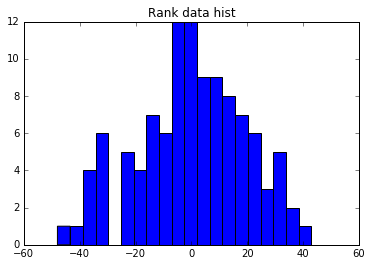

('Masculino', 'Feminino')


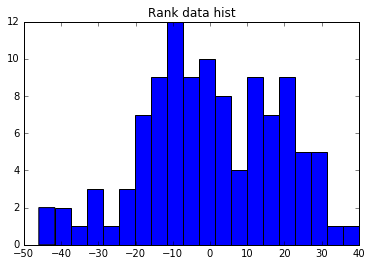

('Baixa', 'Media')


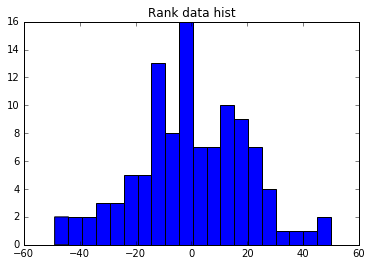

('Casado', 'Solteiro')


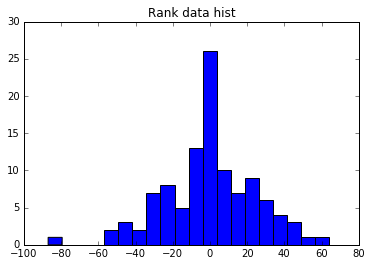

In [21]:
np.warnings.filterwarnings("ignore")
groups = [('Jovem', 'Adulto'), ('Masculino', 'Feminino'), ('Baixa', 'Media'), ('Casado', 'Solteiro')]
for first_min_second in groups:
    rankg1_rd = rankdata(df['V3.%s' % first_min_second[0]].values)
    rankg2_rd = rankdata(df['V3.%s' % first_min_second[1]].values)
    
    rankg1_as = df['V3.%s' % first_min_second[0]].values.argsort()
    rankg2_as = df['V3.%s' % first_min_second[1]].values.argsort()
    
    print(first_min_second)
    plt.hist(rankg1_rd - rankg2_rd, bins=20)
    plt.title('Rank data hist')
    plt.show()
    plt.xlim((-108, 108))
    plt.close()
    
    #plt.hist(rankg1_as - rankg2_as, bins=20)
    #plt.title('Argsort hist')
    #plt.xlim((-108, 108))
    #plt.show()

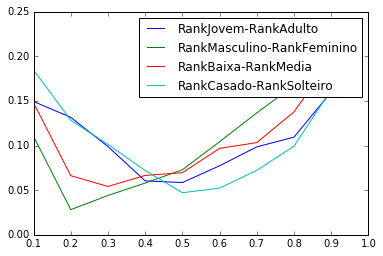

In [22]:
np.warnings.filterwarnings("ignore")
groups = [('Jovem', 'Adulto'), ('Masculino', 'Feminino'), ('Baixa', 'Media'), ('Casado', 'Solteiro')]
for first_min_second in groups:
    rankg1 = rankdata(df['V3.%s' % first_min_second[0]].values)
    rankg2 = rankdata(df['V3.%s' % first_min_second[1]].values)
    response = np.array((rankg1 - rankg2), dtype='d')
    response = pd.DataFrame(response, columns=['Rank%s-Rank%s' % first_min_second])
    model = QuantReg(response, X)
    qs = []
    pr2s = []
    #print(first_min_second)
    for q in np.linspace(0.1, 0.9, 9):
        fitted = model.fit(q=q)
        pr2 = fitted.prsquared
        qs.append(q)
        pr2s.append(pr2)
        model.predict(X.values.T)
        #print('_'.join(first_min_second), q, pr2, 'seguro')
    plt.plot(qs, pr2s, label='Rank%s-Rank%s' % first_min_second)
plt.legend()
plt.show()

In [32]:
np.warnings.filterwarnings("ignore")
groups = [('Jovem', 'Adulto'), ('Masculino', 'Feminino'), ('Baixa', 'Media'), ('Casado', 'Solteiro')]
for first_min_second in groups:
    rankg1 = rankdata(df['V3.%s' % first_min_second[0]].values)
    rankg2 = rankdata(df['V3.%s' % first_min_second[1]].values)
    response = np.array((rankg1 - rankg2), dtype='d')
    response = pd.DataFrame(response, columns=['Rank%s-Rank%s' % first_min_second])
    model = QuantReg(response, X)
    
    to_plot = first_min_second[0] == 'Jovem'
    
    print('!!!!!!!!!!!!!!!')
    print(first_min_second)
    print('!!!!!!!!!!!!!!!')
    
    for q in [0.1, 0.9]:
        fitted = model.fit(q=q)
        p = fitted.predict()
        print(p)
        print(q, (p > 0).sum() / len(p), (p < 0).sum() / len(p))
        #for feat in fitted.pvalues.index:
        #    print('_'.join(first_min_second), feat, fitted.params[feat], q, fitted.pvalues[feat])
        print()
        #print(q)
        print(fitted.params[fitted.pvalues < 0.05])
        print(fitted.pvalues[fitted.pvalues < 0.05])
        print(fitted.summary())
        print()
        print('-')
    print()
    print()

!!!!!!!!!!!!!!!
('Jovem', 'Adulto')
!!!!!!!!!!!!!!!
[-19.48295066  -7.91411945 -18.31000616  -5.17654987  -7.14527123
 -10.40454533 -19.67242192 -21.47765819 -23.48548137 -17.93636393
 -47.96395197 -14.4351529  -11.71739774 -12.47219042  -9.46538296
 -25.13762355  -8.78971644 -24.24448727 -12.48997386 -22.17406967
 -19.65545161 -18.25955827 -25.70310283 -14.72992542 -26.86608059
 -21.71230056 -17.02156657 -24.69334395 -29.34403788 -27.95944405
 -21.51674657 -25.21933423 -23.01942949 -21.4014047  -13.70490954
 -17.45848802 -22.32834321 -15.22822708 -15.64861613 -23.09741673
 -18.56336554 -19.2985284  -10.65446988  -9.5333234  -11.01625475
 -19.93413765 -11.07724222 -28.15146852 -18.45492113 -20.60281101
 -14.79720695 -16.83957586 -17.01819852 -30.48312934 -17.31023685
 -31.82755362 -23.75686582 -13.46048287 -20.06561844 -14.51318535
 -30.50430479 -11.066297   -10.07339212 -17.03973302 -42.04394224
 -22.86648523 -20.94563662  -4.99999987 -22.42452591 -16.57193808
 -10.67064591 -13.487412